In [17]:
# Basic libraries
import pandas as pd
from itertools import combinations

# Visualization
import matplotlib.pyplot as plt

# Project libraries
# set path to local modules and submodules
import sys, os
sys.path.append(os.path.abspath("src")) # add src folder to path
# import local modules and submodules
import data_ravers_utils.visualization as plots
import data_ravers_utils.file_handler as fl
import data_ravers_utils.eda_utils as eda


# Histogram and scatter plots for numeric columns

In [2]:
df_filename = 'bandcamp-sales-v1-cleaned'
data = fl.read_df_pickle(df_filename)
df = data.copy()
df.head(5)

,country_code,country,artist_name,amount_paid_usd,hour,dayofweek,month,year,weekday,weekend,...,media_type,media_type_details,discography_size,merch_type,is_bundle,amount_over_usd,item_price_usd,overpayment_usd,discount_usd,is_donation
0,gb,United Kingdom,Girl Band,9.99,22,2,9,2020,2,False,...,digital,album,0,other,0,0.0,9.99,2.288818e-07,0.000000e+00,1
1,fi,Finland,Jirah,1.30,22,2,9,2020,2,False,...,digital,album,0,other,0,0.0,1.30,0.000000e+00,0.000000e+00,0
2,fi,Finland,D-Ther,3.90,22,2,9,2020,2,False,...,digital,album,0,other,0,0.0,3.90,0.000000e+00,4.440892e-16,0
3,gb,United Kingdom,WHITE NOISE TV,12.39,22,2,9,2020,2,False,...,CD,no details,0,other,0,0.0,12.39,0.000000e+00,1.776357e-15,0
4,us,United States,LINGUA IGNOTA,1.00,22,2,9,2020,2,False,...,digital,single,0,other,0,0.0,1.00,0.000000e+00,0.000000e+00,0


In [3]:
target_variable = "amount_paid_usd"

In [ ]:
features_payment = ['amount_paid_usd', 'amount_over_usd', 'item_price_usd', 'overpayment_usd', 'discount_usd', 'is_donation']
features_datetime = ['hour', 'dayofweek', 'month', 'year', 'weekday', 'weekend', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']
features_product = ['artist_name', 'media_type', 'media_type_details', 'discography_size', 'merch_type', 'is_bundle']
features_geo = ['country_code', 'country']

In [11]:
features_dict = {}
features_dict['features_datetime'] = features_datetime
features_dict['features_geo'] = ['country_code']
features_dict['features_payment'] = features_payment


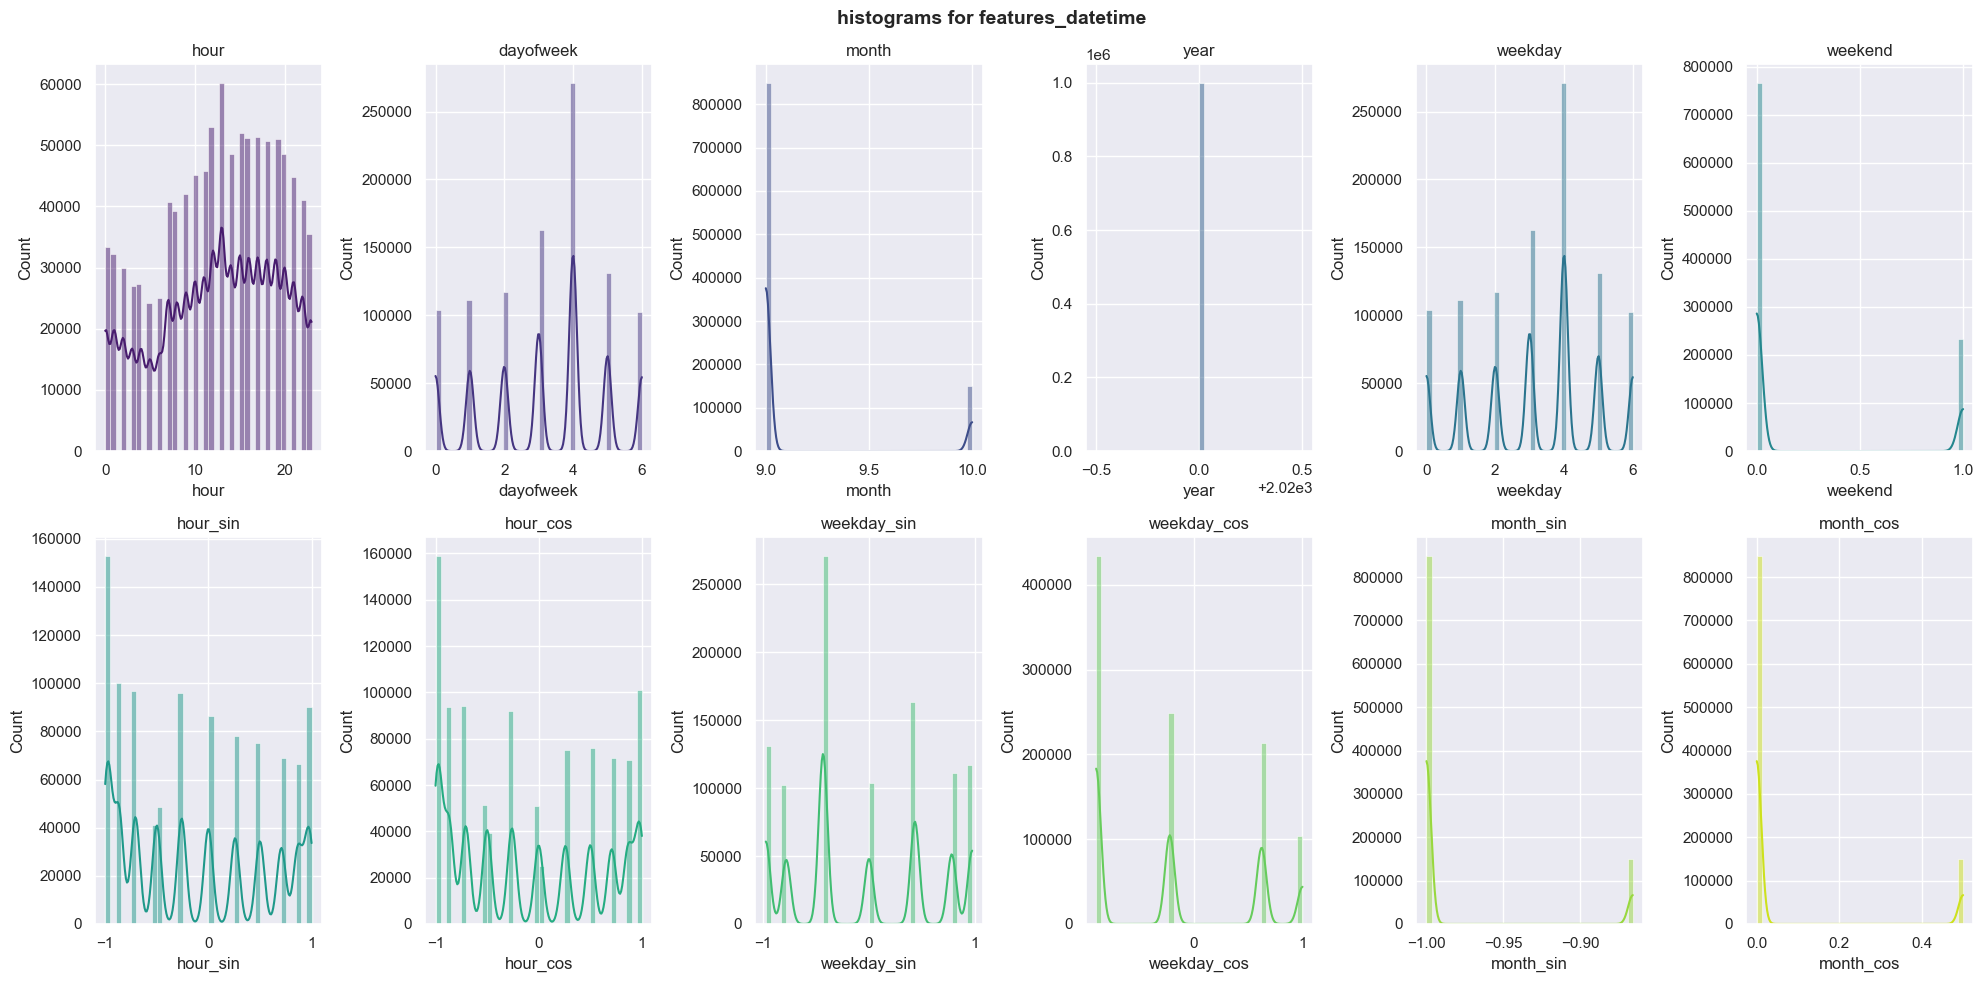

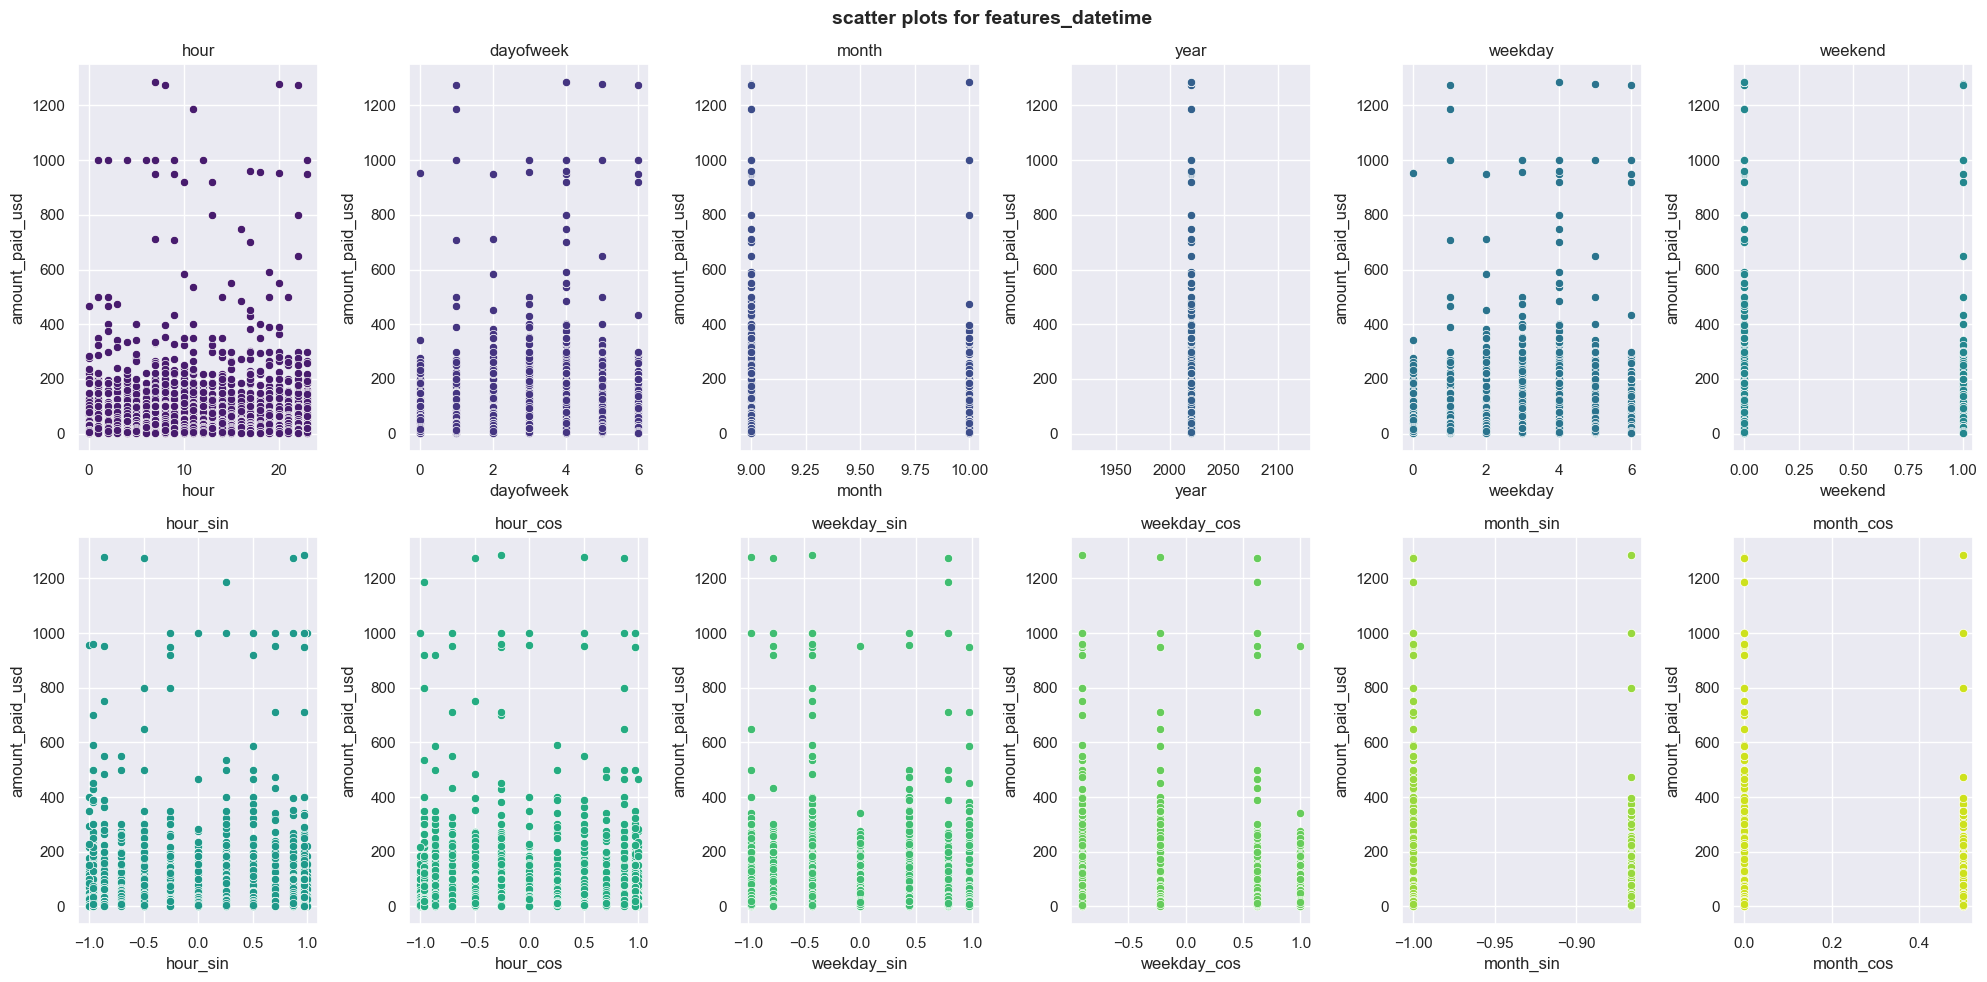

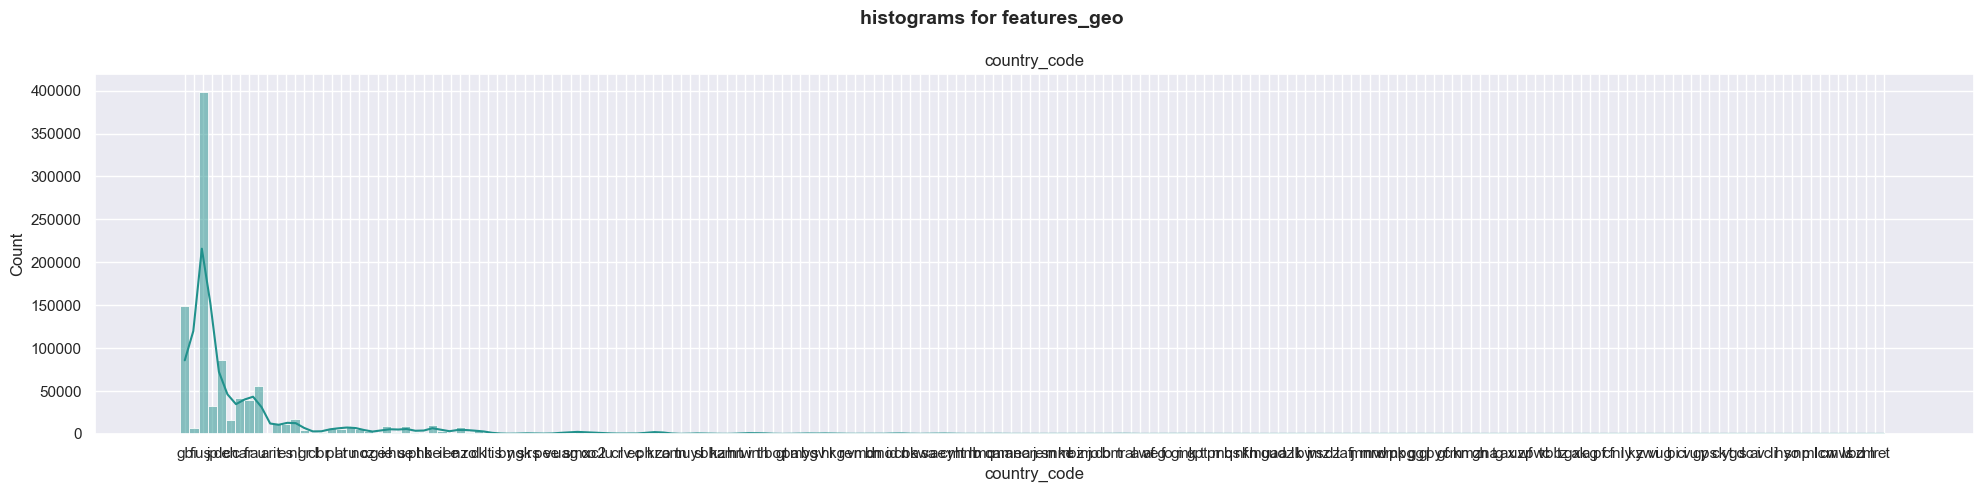

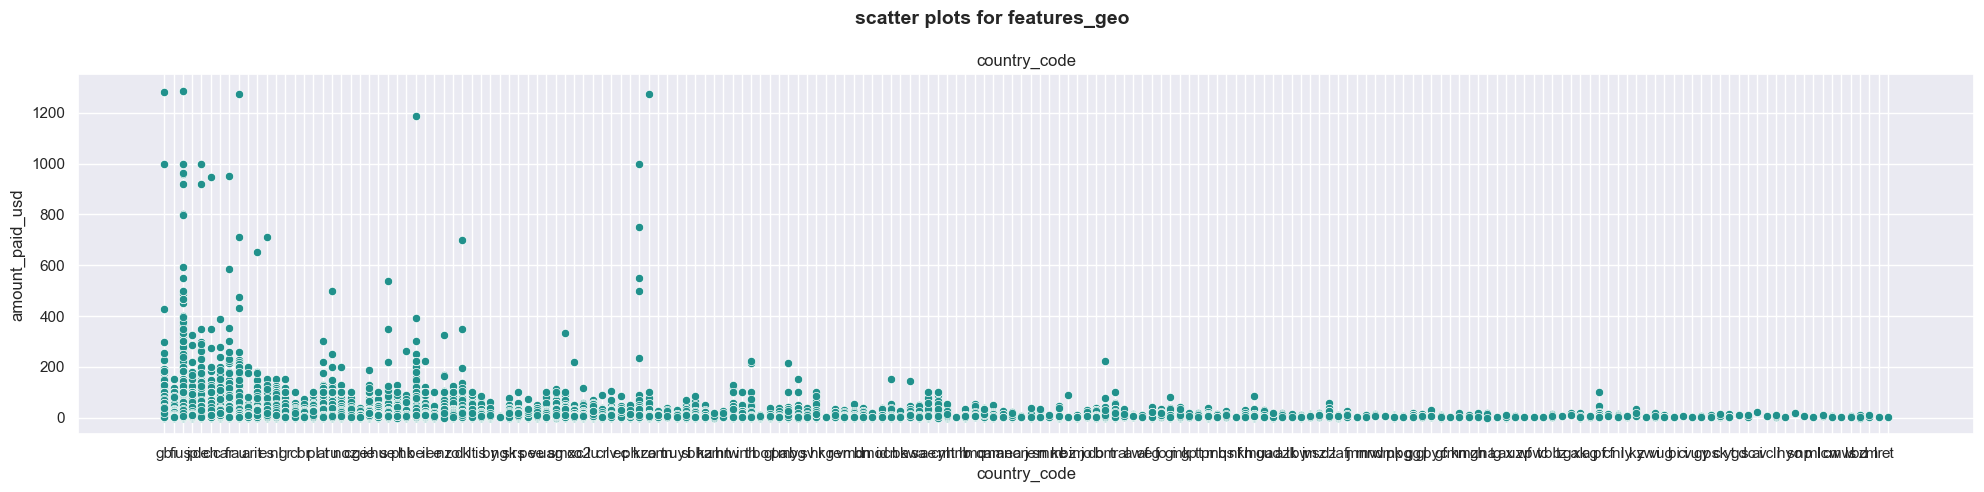

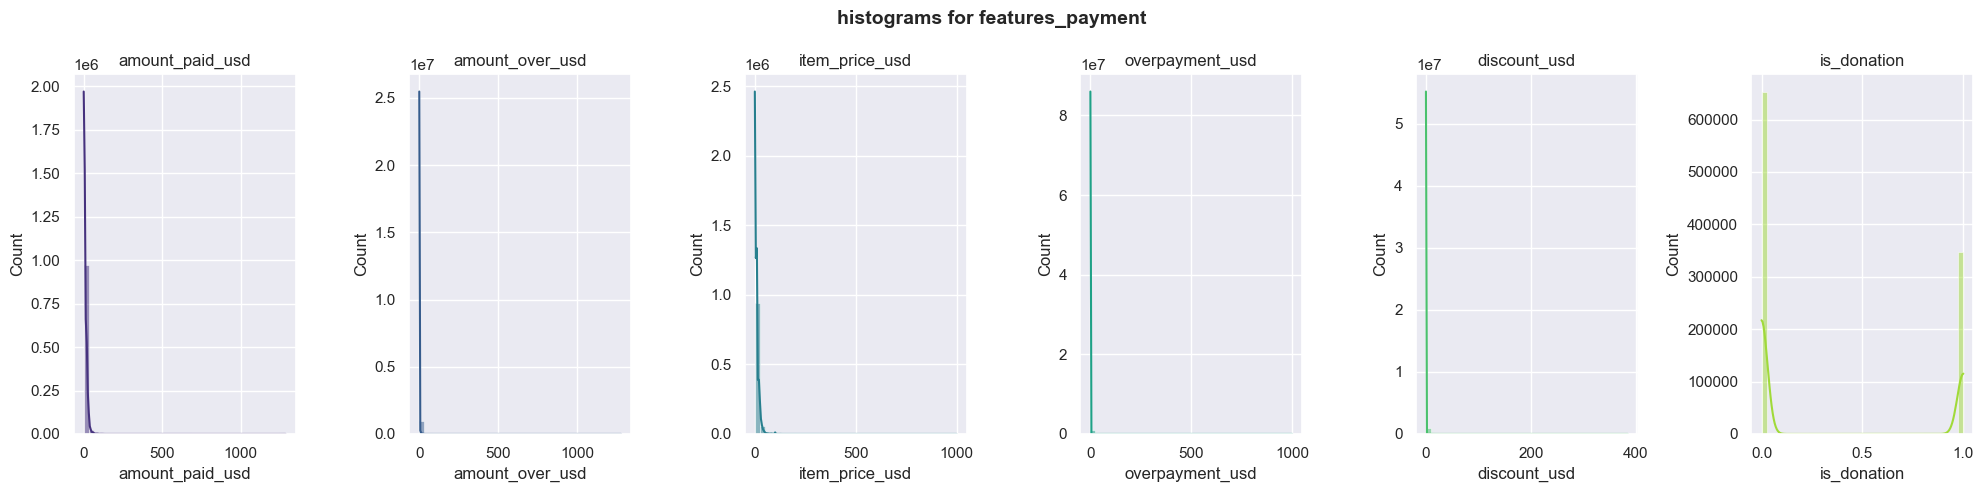

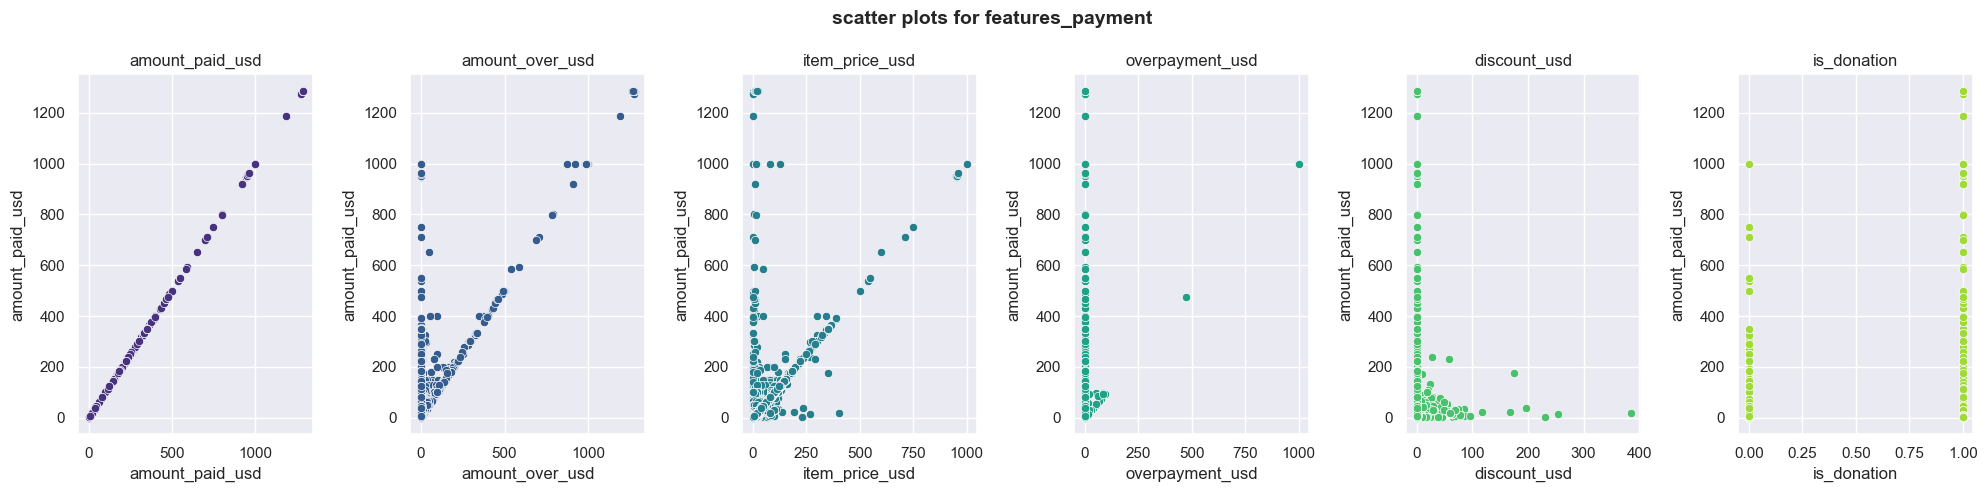

In [12]:
for group, features in features_dict.items():
    # set color palette and theme for maximum of colors set to columns count
    plots.plot_config(target_column=target_variable, max_colors=len(features), max_columns=6)
    # create piled plots for the list of features
    plots.plots_for_numeric_columns(df, features, plots.PlotType.HISTOGRAM, f"histograms for {group}")
    plots.plots_for_numeric_columns(df, features, plots.PlotType.SCATTER, f"scatter plots for {group}")

# Data Science Lifecycle

In [19]:
ds_lifecycle = {
    "Problem Understanding": 5,
    "Data Collection": 10,
    "Data Cleaning": 20,
    "Exploratory Data Analysis": 50,
    "Feature Engineering": 25,
    "Modeling": 30,
    "Evaluation": 10,
    # "Deployment": 0
}

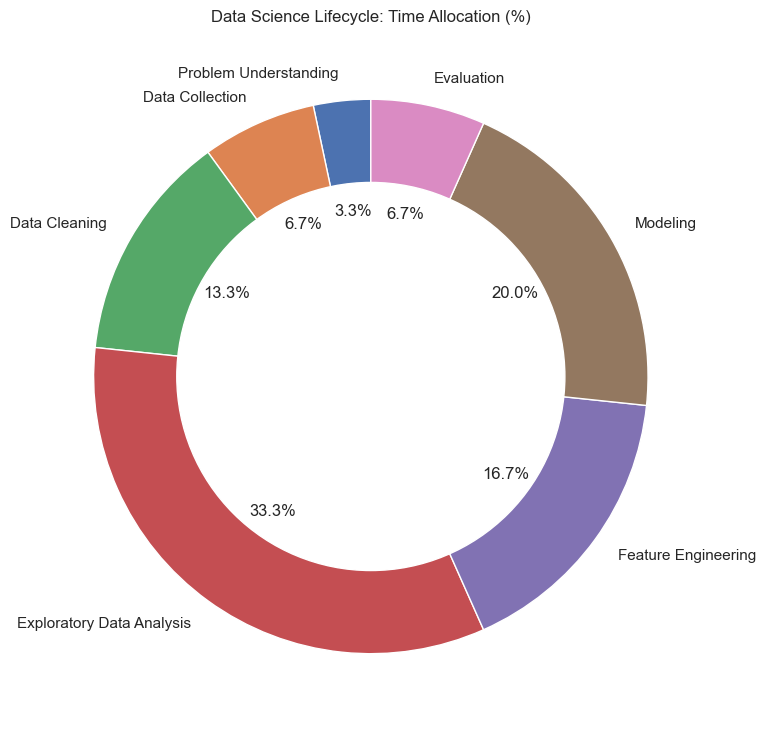

In [20]:
# Create a donut chart
labels = ds_lifecycle.keys()
sizes = ds_lifecycle.values()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Draw a circle at the center to turn the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

ax.set_title("Data Science Lifecycle: Time Allocation (%)")
plt.tight_layout()
plt.show()